# CSE185 Lab 5 Report - Code Documentation (10 pts)

* Document any commands used or additional analysis steps below!
* You should include enough detail that the instructors (or your future self) could come back to this several months from now and know exactly what you did and why you did it.
* We will not run this notebook, but will look back to see what you did especially if you end up with different answers.

For grading purposes only - Do not copy or edit this cell!

In [1]:
# q1



# num reads in each fastq file
!grep -c "^@" ~/public/lab5/Oct4.esc.fastq
!grep -c "^@" ~/public/lab5/Klf4.esc.fastq
!grep -c "^@" ~/public/lab5/Sox2.esc.fastq
!grep -c "^@" ~/public/lab5/H3K27ac.esc.fastq
!grep -c "^@" ~/public/lab5/H3K4me2.esc.fastq
!grep -c "^@" ~/public/lab5/input.esc.fastq

# read length
!awk 'NR%4==2{print length($1); exit}' ~/public/lab5/Oct4.esc.fastq
!awk 'NR%4==2{print length($1); exit}' ~/public/lab5/Klf4.esc.fastq
!awk 'NR%4==2{print length($1); exit}' ~/public/lab5/Sox2.esc.fastq
!awk 'NR%4==2{print length($1); exit}' ~/public/lab5/H3K27ac.esc.fastq
!awk 'NR%4==2{print length($1); exit}' ~/public/lab5/H3K4me2.esc.fastq
!awk 'NR%4==2{print length($1); exit}' ~/public/lab5/input.esc.fastq

2154383
2192538
2160958
1915574
2363048
2034054
50
50
50
50
50
50


In [ ]:
# q2
#  aligning reads
bwa mem -t 6 ~/public/genomes/GRCm38.fa ~/public/lab5/Oct4.esc.fastq > ~/lab5/Oct4.sam
bwa mem -t 6 ~/public/genomes/GRCm38.fa ~/public/lab5/Klf4.esc.fastq > ~/lab5/Klf4.sam
bwa mem -t 6 ~/public/genomes/GRCm38.fa ~/public/lab5/Sox2.esc.fastq > ~/lab5/Sox2.sam
bwa mem -t 6 ~/public/genomes/GRCm38.fa ~/public/lab5/H3K27ac.esc.fastq > ~/lab5/H3K27ac.sam
bwa mem -t 6 ~/public/genomes/GRCm38.fa ~/public/lab5/H3K4me2.esc.fastq > ~/lab5/H3K4me2.sam
bwa mem -t 6 ~/public/genomes/GRCm38.fa ~/public/lab5/input.esc.fastq > ~/lab5/input.sam

In [ ]:
# sam2bam

samtools view -S -b Oct4.sam > Oct4.bam
samtools sort Oct4.bam > Oct4.sorted.bam
samtools index Oct4.sorted.bam

samtools view -S -b Klf4.sam > Klf4.bam
samtools sort Klf4.bam > Klf4.sorted.bam
samtools index Klf4.sorted.bam

samtools view -S -b Sox2.sam > Sox2.bam
samtools sort Sox2.bam > Sox2.sorted.bam
samtools index Sox2.sorted.bam

samtools view -S -b H3K27ac.sam > H3K27ac.bam
samtools sort H3K27ac.bam > H3K27ac.sorted.bam
samtools index H3K27ac.sorted.bam

samtools view -S -b H3K4me2.sam > H3K4me2.bam
samtools sort H3K4me2.bam > H3K4me2.sorted.bam
samtools index H3K4me2.sorted.bam

samtools view -S -b input.sam > input.bam
samtools sort input.bam > input.sorted.bam
samtools index input.sorted.bam

In [2]:
# q3
samtools flagstat Oct4.sam
samtools flagstat Klf4.sam
samtools flagstat Sox2.sam
samtools flagstat H3K27ac.sam
samtools flagstat H3K4me2.sam
samtools flagstat input.sam

In [3]:
# part 2: homer
makeTagDirectory ~/lab5/tagdirs/Oct4 ~/lab5/Oct4.sorted.bam
makeTagDirectory ~/lab5/tagdirs/Klf4 ~/lab5/Klf4.sorted.bam
makeTagDirectory ~/lab5/tagdirs/Sox2 ~/lab5/Sox2.sorted.bam
makeTagDirectory ~/lab5/tagdirs/H3K27ac ~/lab5/H3K27ac.sorted.bam
makeTagDirectory ~/lab5/tagdirs/H3K4me2 ~/lab5/H3K4me2.sorted.bam
makeTagDirectory ~/lab5/tagdirs/input ~/lab5/input.sorted.bam

SyntaxError: invalid syntax (4005696422.py, line 2)

In [4]:
# part 3: make bedgraph files
makeUCSCfile ~/lab5/tagdirs/Oct4 -o auto
makeUCSCfile ~/lab5/tagdirs/Klf4 -o auto
makeUCSCfile ~/lab5/tagdirs/Sox2 -o auto
makeUCSCfile ~/lab5/tagdirs/H3K27ac -o auto
makeUCSCfile ~/lab5/tagdirs/H3K4me2 -o auto
makeUCSCfile ~/lab5/tagdirs/input -o auto

SyntaxError: invalid syntax (4223916155.py, line 2)

In [6]:
# Part 4

#Get peaks files
findPeaks ~/lab5/tagdirs/Oct4 -i ~/lab5/tagdirs/input -style factor -o auto
findPeaks ~/lab5/tagdirs/Klf4 -i ~/lab5/tagdirs/input -style factor -o auto
findPeaks ~/lab5/tagdirs/Sox2 -i ~/lab5/tagdirs/input -style factor -o auto
findPeaks ~/lab5/tagdirs/H3K27ac -i ~/lab5/tagdirs/input -style histone -o auto
findPeaks ~/lab5/tagdirs/H3K4me2 -i ~/lab5/tagdirs/input -style histone -o auto

#create bed files
pos2bed.pl ~/lab5/tagdirs/Oct4/peaks.txt > ~/lab5/tagdirs/Oct4/Oct4.peaks.bed
pos2bed.pl ~/lab5/tagdirs/Klf4/peaks.txt > ~/lab5/tagdirs/Klf4/Klf4.peaks.bed
pos2bed.pl ~/lab5/tagdirs/Sox2/peaks.txt > ~/lab5/tagdirs/Sox2/Sox2.peaks.bed
pos2bed.pl ~/lab5/tagdirs/H3K27ac/regions.txt > ~/lab5/tagdirs/H3K27ac/H3K27ac.regions.bed
pos2bed.pl ~/lab5/tagdirs/H3K4me2/regions.txt > ~/lab5/tagdirs/H3K4me2/H3K4me2.regions.bed

SyntaxError: invalid syntax (2775618877.py, line 4)

In [7]:
# q5: avg peak size
awk 'BEGIN { total = 0; count = 0 } !/^#/ { total += $3 - $2; count++ } END { print "Average peak size:", (count > 0) ? total / count : 0 }' ~/lab5/tagdirs/Oct4/peaks.txt
awk 'BEGIN { total = 0; count = 0 } !/^#/ { total += $3 - $2; count++ } END { print "Average peak size:", (count > 0) ? total / count : 0 }' ~/lab5/tagdirs/Klf4/peaks.txt
awk 'BEGIN { total = 0; count = 0 } !/^#/ { total += $3 - $2; count++ } END { print "Average peak size:", (count > 0) ? total / count : 0 }' ~/lab5/tagdirs/Sox2/peaks.txt
awk 'BEGIN { total = 0; count = 0 } !/^#/ { total += $3 - $2; count++ } END { print "Average peak size:", (count > 0) ? total / count : 0 }' ~/lab5/tagdirs/H3K27ac/regions.txt
awk 'BEGIN { total = 0; count = 0 } !/^#/ { total += $3 - $2; count++ } END { print "Average peak size:", (count > 0) ? total / count : 0 }' ~/lab5/tagdirs/H3K4me2/regions.txt

SyntaxError: invalid syntax (4218679573.py, line 2)

In [8]:
# part 5

-size 8000 \
  ~/public/genomes/GRCm38.fa \
  -size 8000 \
  -hist 10 \
  -d ~/lab5/tagdirs/Oct4 ~/lab5/tagdirs/Sox2 ~/lab5/tagdirs/Klf4 ~/lab5/tagdirs/H3K4me2 ~/lab5/tagdirs/H3K27ac \
  -gtf ~/public/genomes/GRCm38.75.gtf > ~/lab5/annotations/tss_histogram.txt

SyntaxError: invalid syntax (1827425410.py, line 3)

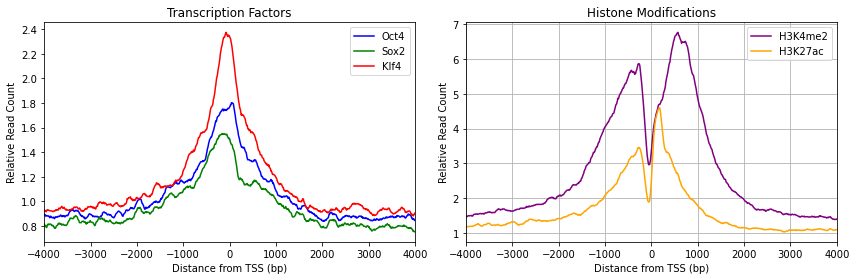

In [19]:
# q6

import pandas as pd
import matplotlib.pyplot as plt

# Read the tss_histogram.txt file using pandas
df = pd.read_csv('/home/l1joseph/lab5/annotations/tss_histogram.txt', sep='\t')

# Extract the distance from TSS and the coverage values for each dataset
distance = df.iloc[:, 0]
oct4_coverage = df.iloc[:, 1]
sox2_coverage = df.iloc[:, 4]
klf4_coverage = df.iloc[:, 7]
h3k4me2_coverage = df.iloc[:, 10]
h3k27ac_coverage = df.iloc[:, 13]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot transcription factors
ax1.plot(distance, oct4_coverage, label='Oct4', color='blue')
ax1.plot(distance, sox2_coverage, label='Sox2', color='green')
ax1.plot(distance, klf4_coverage, label='Klf4', color='red')
ax1.set_xlabel('Distance from TSS (bp)')
ax1.set_ylabel('Relative Read Count')
ax1.set_title('Transcription Factors')
ax1.legend()

# Plot histone modifications
ax2.plot(distance, h3k4me2_coverage, label='H3K4me2', color='purple')
ax2.plot(distance, h3k27ac_coverage, label='H3K27ac', color='orange')
ax2.set_xlabel('Distance from TSS (bp)')
ax2.set_ylabel('Relative Read Count')
ax2.set_title('Histone Modifications')
ax2.legend()

# Set the x-axis range
ax1.set_xlim(-4000, 4000)
ax2.set_xlim(-4000, 4000)

plt.tight_layout()
plt.grid(True)
plt.savefig('Histograms.png')
plt.show()

In [ ]:
# part 6
# q7

prefix=Oct4
findMotifsGenome.pl ~/lab5/tagdirs/${prefix}/peaks.txt ~/public/genomes/GRCm38.fa ~/lab5/motifs/${prefix} -mask -size 100 -p 15

prefix=Klf4
findMotifsGenome.pl ~/lab5/tagdirs/${prefix}/peaks.txt ~/public/genomes/GRCm38.fa ~/lab5/motifs/${prefix} -mask -size 100 -p 15

prefix=Sox2
findMotifsGenome.pl ~/lab5/tagdirs/${prefix}/peaks.txt ~/public/genomes/GRCm38.fa ~/lab5/motifs/${prefix} -mask -size 100 -p 15

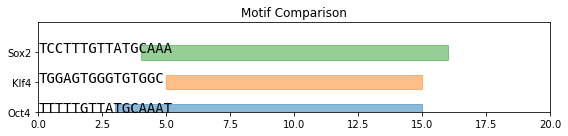

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_motif_comparison(motifs, consensus, labels, colors):
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.set_xlim(0, 20)
    ax.set_ylim(0, len(motifs))
    ax.set_yticks(range(len(motifs)))
    ax.set_yticklabels(labels)
    ax.grid(False)
    ax.set_title('Motif Comparison')

    for i, (motif, cons, color) in enumerate(zip(motifs, consensus, colors)):
        start = cons.index(motif)
        end = start + len(motif)
        
        ax.text(0, i, cons, fontfamily='monospace', fontsize=14, color='black')
        ax.add_patch(Rectangle((start, i-0.25), len(motif), 0.5, fill=True, color=color, alpha=0.5))
        
    plt.tight_layout()
#     plt.savefig('motif_comparison.png', dpi=150)

motifs = ['TTGTTATGCAAA', 'TGGGTGTGGC', 'TTGTTATGCAAA'] 
consensus = ['TTTTTGTTATGCAAAT', 'TGGAGTGGGTGTGGC', 'TCCTTTGTTATGCAAA']
labels = ['Oct4', 'Klf4', 'Sox2']  
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plot_motif_comparison(motifs, consensus, labels, colors)

In [21]:
# part 7
mergePeaks ~/lab5/tagdirs/Oct4/peaks.txt ~/lab5/tagdirs/Sox2/peaks.txt > ~/lab5/overlap/oct4_sox2_peaks_merged.txt

annotatePeaks.pl \
   ~/lab5/overlap/oct4_sox2_peaks_merged.txt \
  ~/public/genomes/GRCm38.fa \
  -d ~/lab5/tagdirs/Oct4 ~/lab5/tagdirs/Sox2 > ~/lab5/overlap/oct4_sox2_scatter.txt

SyntaxError: invalid syntax (454102637.py, line 2)

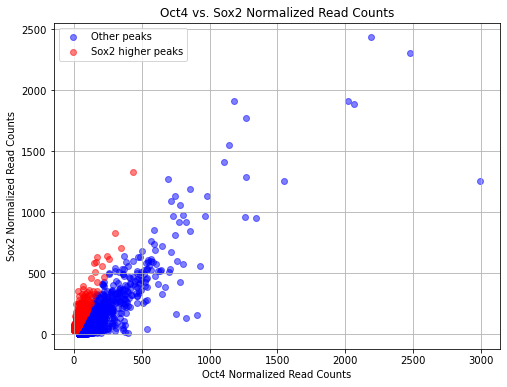

In [29]:
# q8

import pandas as pd
import matplotlib.pyplot as plt

# Read the oct4_sox2_scatter.txt file using pandas
df = pd.read_csv('~/lab5/overlap/oct4_sox2_scatter.txt', sep='\t', comment='#')

# Extract the normalized tag counts for Oct4 and Sox2
oct4_counts = df.iloc[:, -2]
sox2_counts = df.iloc[:, -1]

# Identify peaks with two-fold higher binding in Sox2 vs. Oct4
sox2_higher = sox2_counts > 2 * oct4_counts

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(oct4_counts[~sox2_higher], sox2_counts[~sox2_higher], color='blue', alpha=0.5, label='Other peaks')
plt.scatter(oct4_counts[sox2_higher], sox2_counts[sox2_higher], color='red', alpha=0.5, label='Sox2 higher peaks')

# Add labels and title
plt.xlabel('Oct4 Normalized Read Counts')
plt.ylabel('Sox2 Normalized Read Counts')
plt.title('Oct4 vs. Sox2 Normalized Read Counts')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.savefig('OctSoxBinding.png')
plt.show()


In [32]:
# q9

# motif finding
filter_data = df[fold_change >= 2]
filter_data.to_csv("~/lab5/overlap/unique_sox2_peaks.txt", sep="\t", index=False)

In [34]:
# q9
prefix=Sox2
findMotifsGenome.pl ~/lab5/overlap/unique_sox2_peaks.txt ~/public/genomes/GRCm38.fa ~/lab5/overlap/unique_sox2_motifs -mask -size 100 -p 25

SyntaxError: invalid syntax (1287912879.py, line 3)